In [6]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.widgets import Slider, Button
# from mude_tools import magicplotter
%matplotlib nbagg

## Introduction

A very general problem that is often encountered is that we have some target variable $t$ that we want to predict as a function of a predictor variable $x$, but we only have inaccurate measurements of our target variable. Some examples of possible problems where this kind of framework can be applied is given below:

| Problem | Target variable $t$ | Predictor variable $x$ |
| :-- | :-- | :-- |
| Structural health monitoring of a bridge | Displacement| Location along the bridge |
| Fatigue testing of a steel specimen | Stress | Number of loading cylces |
| Flood control of the river Maas | Volumetric flow rate | Precipitation in the Ardennes |
| Radioactive decay of a radon-222 sample | Number of $\alpha$-particles emitted | Time |
| Cooling rate of my coffee cup | Temperature | Time |

To strip the problem down to its bare essentials, we will make use of a toy problem, where we actually know the true target function $f(x)$. In our case, this will be a simple sine wave, of which we make 100 noisy measurements from $x=0$ to $x=2 \pi$. Note that in a practical setting, we only have access to these measurements, and not to the true function that generated the data. Finding a good estimate of $f(x)$ is one of our main objectives.

<IPython.core.display.Javascript object>


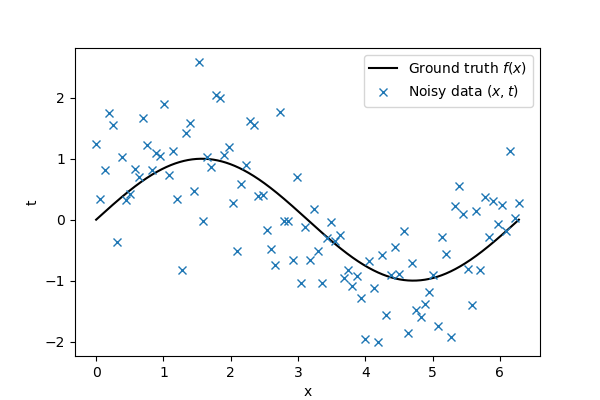

In [7]:
# The true function relating t to x
def f (x, l=2*np.pi):
    return np.sin(x*2*np.pi/l)

# Define the number of measurements, and how noisy they are
N = 100
noise = 0.7

# Use a seed, to ensure that the results are reproducible
seed = 0
np.random.seed(seed)

# Define two linspaces along x
# x_pred --> locations where we want to make predictions, i.e. everywhere
# x      --> locations where we observe data
x_pred = np.linspace(0, 2*np.pi, 1000)
x = np.linspace(0, 2*np.pi, N)

# Generate the observed data
t = f(x) + np.random.normal(0, noise, N)

# Plot the data and the ground truth
plt.figure(figsize=(6,4))

plt.plot(x_pred, f(x_pred), 'k-', label=r'Ground truth $f(x)$')
plt.plot(x, t, 'x', label=r'Noisy data $(x,t)$')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()

plt.show()

## k-nearest neighbors

A (perhaps naive) approach to find $y(x)$ (i.e. the approximation of $f(x)$) would be to simply look at the surrounding data points, and take their average to get an estimate of $f(x)$. This approach is called __k-nearest neighbors__, where $k$ refers to the number of surrounding points we are looking at.

Implementing this is not trivial, but thankfully other people have made implementations for us. We will use the `KNeighborsRegressor` function from the `sklearn.neighbors` library to fit our data and get $y(x)$ to make predictions.

In [8]:
# Define the prediction locations
# (note that these are different from the locations where we observed our data)
x_pred = np.linspace(0, 2*np.pi, 1000)

# Define a function that makes a KNN prediction at the given locations, based on the given (x,t) data
def KNN(x=x, t=t, x_pred=x_pred, k=1):
    
    # Convert x and x_pred to a column vector in order for KNeighborsRegresser to work
    X = x.reshape(-1,1)
    X_pred = x_pred.reshape(-1,1)
    
    # Train the KNN based on the given (x,t) data
    neigh = KNeighborsRegressor(k)
    neigh.fit(X, t)
    
    # Make a prediction at the locations given by x_pred
    y = neigh.predict(X_pred)
    
    # Return the predicted values
    return y

# Define a function that creates a plot
def plot_KNN(ax, y_k, k):
    
    ax.plot(x_pred, f(x_pred), 'k-', label=r'Ground truth $f(x)$')
    ax.plot(x, t, 'x', label=r'Noisy data $(x,t)$')
    ax.plot(x_pred, y_k, '-', label=r'Prediction $y(x)$'.format(k))
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title('k = {}'.format(k))

<IPython.core.display.Javascript object>


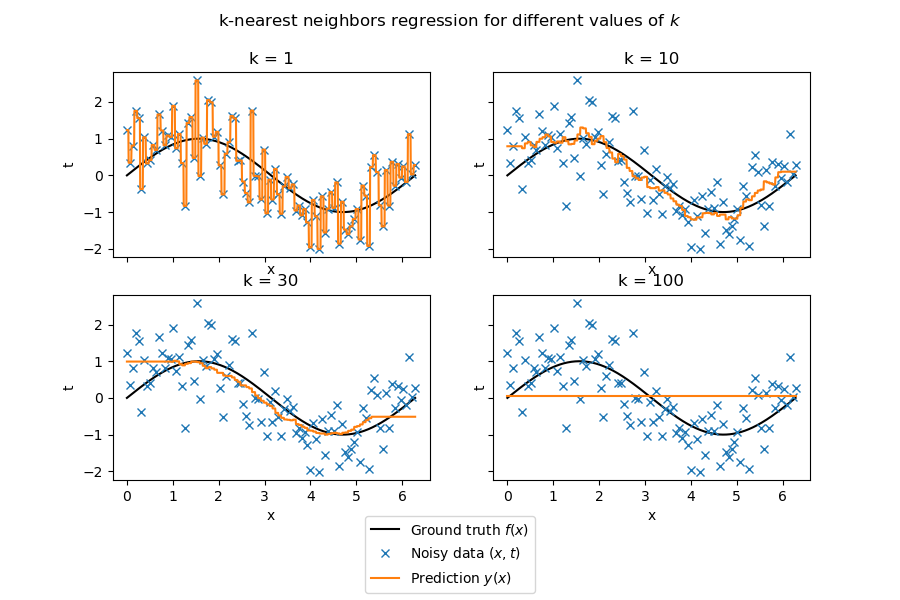

In [9]:
# Make predictions using the KNN function, for varying values of k
y_1 = KNN(x, t, x_pred, 1)
y_10 = KNN(x, t, x_pred, 10)
y_30 = KNN(x, t, x_pred, 30)
y_100 = KNN(x, t, x_pred, 100)

# Plot the resulting predictions
# tight_layout=True or constrained_layout=True does not play nice with the legend :(
fig, ax = plt.subplots(2, 2, figsize=(9,6), sharex='all', sharey='all') 
plt.suptitle(r'k-nearest neighbors regression for different values of $k$')

# Plot for k=1
plot_KNN(ax[0][0], y_1, 1)

# Plot for k=10
plot_KNN(ax[0][1], y_10, 10)

# Plot for k=30
plot_KNN(ax[1][0], y_30, 30)

# Plot for k=100
plot_KNN(ax[1][1], y_100, 100)

# Add a general legend at the bottom of the plot
plt.subplots_adjust(bottom=0.2)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')

plt.show()

Looking at the previous plots, a few questions might pop up:
- For $k=1$, we see that our prediction matches the observed data exactly in all data points. Is this desirable?
- For $k=30$, what is going on around $x=0$ and $x=2 \pi$?
- For $k=100$, why is our prediction constant with respect to $x$?

## Varying our model parameters

Clearly, there is some value of $k$ between 1 and 100 that would give us the best predictions. Using the script below, you can generate a plot where the following variables can be adjusted:
- $k$, the number of neighbours over which the average is taken
- $N$, the size of the training data set
- $l$, the wave length of the underlying truth
- $\varepsilon$, the level of noise associated with the data
- The seed can be updated to generate new random data sets
- The truth can be hidden, to simulate a situation that is closer to a practical setting

It is not necessary to understand all of the code below, it just generates the interactive plot.

<IPython.core.display.Javascript object>


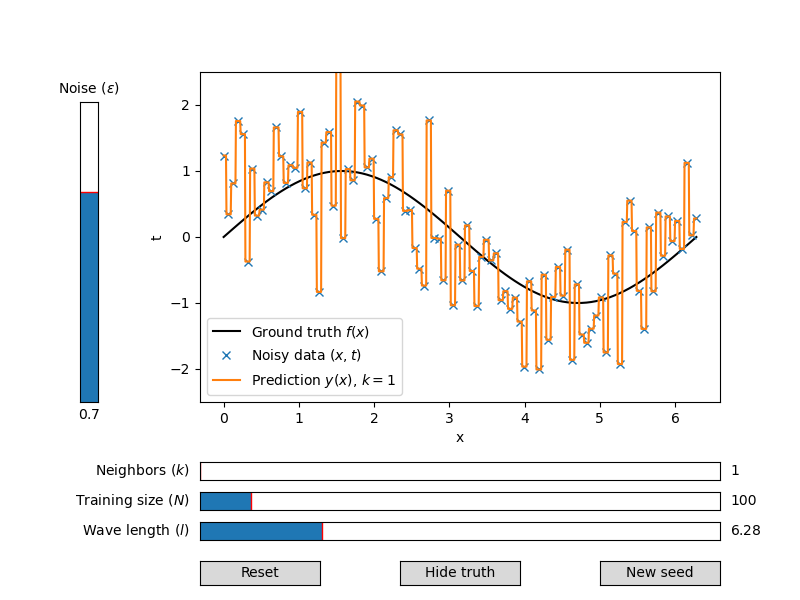

In [10]:
################
# Initial plot #
################

# Create an initial plot
fig, ax = plt.subplots(figsize=(8,6))
truth, = plt.plot(x, f(x), 'k-', label=r'Ground truth $f(x)$')
data, = plt.plot(x, t, 'x', label=r'Noisy data $(x,t)$')
pred, = plt.plot(x_pred, y_1, '-', label=r'Prediction $y(x)$, $k=1$')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_ylim((-2.5, 2.5))
plt.legend(loc='lower left')

# plot = magicplotter(x, t, x_pred, f(x_pred), x_pred, y_1)

# Adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.33)

###########
# Sliders #
###########

# Make a horizontal slider to control the number of neighbors
ax_k = plt.axes([0.25, 0.20, 0.65, 0.03])
k_slider = Slider(
    ax=ax_k,
    label=r'Neighbors ($k$)',
    valmin=1,
    valmax=100,
    valinit=1,
    valfmt='%0.0f'
)

# Make a horizontal slider to control the number of measurements
ax_N = plt.axes([0.25, 0.15, 0.65, 0.03])
N_slider = Slider(
    ax=ax_N,
    label=r'Training size ($N$)',
    valmin=2,
    valmax=1000,
    valinit=N,
    valfmt='%0.0f'
)

# Make a horizontal slider to control the wave length
ax_l = plt.axes([0.25, 0.10, 0.65, 0.03])
l_slider = Slider(
    ax=ax_l,
    label=r'Wave length ($l$)',
    valmin=0.5,
    valmax=8*np.pi,
    valinit=2*np.pi,
)

# Make a vertical slider to control the noise level
ax_eps = plt.axes([0.10, 0.33, 0.0225, 0.50])
eps_slider = Slider(
    ax=ax_eps,
    label=r'Noise ($\varepsilon$)',
    valmin=0,
    valmax=1,
    valinit=noise,
    orientation="vertical"
)

# Define an update function when a slider value changes
def update(event):
    
    global seed

    # Get the slider values
    k = int(min(k_slider.val, N_slider.val))
    N = int(N_slider.val)
    l = l_slider.val
    eps = eps_slider.val
    
    # Generate the noisy data again
    np.random.seed(seed)

    x = np.linspace(0, 2*np.pi, N)
    t = f(x, l) + np.random.normal(0, eps, N)
    
    # Update the ground truth and the data in the plots
    truth.set_data(x_pred, f(x_pred,l))
    data.set_data(x, t)
    
    # Fit the KNN to the updated data
    y_pred = KNN(x=x, t=t, x_pred=x_pred, k=k)
    pred.set_ydata(y_pred)
    
    fig.canvas.draw_idle()

# Connect the update function to each slider
k_slider.on_changed(update)
N_slider.on_changed(update)
l_slider.on_changed(update)
eps_slider.on_changed(update)

###########
# Buttons #
###########

# Make a button to update the seed
ax_seed = plt.axes([0.75, 0.025, 0.15, 0.04])
seed_button = Button(ax_seed, 'New seed', hovercolor='0.975')

# Make a button to hide/show the truth
ax_truth = plt.axes([0.50, 0.025, 0.15, 0.04])
truth_button = Button(ax_truth, 'Hide truth', hovercolor='0.975')

# Make a button to go back to the initial settings
ax_reset = plt.axes([0.25, 0.025, 0.15, 0.04])
reset_button = Button(ax_reset, 'Reset', hovercolor='0.975')

# Define a function that changes the seed
def update_seed(event):
    
    global seed
    
    seed += 1
    
    update(event)

# Define a function that changes the seed
def toggle_truth(event):
    
    if truth.get_alpha() is None:
        truth.set_alpha(0)
        truth_button.label.set_text('Show truth')
    else:
        truth.set_alpha(None)
        truth_button.label.set_text('Hide truth')
        
    update(event)
    
# Define a function that performs a reset
def reset_all(event):
    
    global seed
    
    seed = 0
    
    k_slider.reset()
    N_slider.reset()
    l_slider.reset()
    eps_slider.reset()
    
    if not truth.get_alpha() is None:
        toggle_truth(event)

    update(event)

# Connect the correct function to each button
seed_button.on_clicked(update_seed)
truth_button.on_clicked(toggle_truth)
reset_button.on_clicked(reset_all)

plt.show()

## Playing around with the plots

By visual inspection, use the slider of $k$, to find its optimal value. The following questions might be interesting to ask yourself:
- If the training size $N$ increases/decreases, how does this affect my optimal value of $k$?
- If the wave length $l$ increases/decreases, how does this affect my optimal value of $k$?
- If my measurements are less/more noisy, how does this affect my optimal value of $k$?
- If I generate new data by changing the seed, how is my prediction affected for small values of $k$? What about large values of $k$?
- If I do not know the truth, how do I figure out what my value of $k$ should be?
- So far, all observations were distributed uniformly over $x$. How would our predictions change if our observed data was more clustered?

## Final remarks
So far, we have looked at our k-nearest neighbours regressor in a mostly qualitative manner. However, it is possible to apply a more quantitative framework to our model, and find the optimal value for $k$ in a more structured way. How this is done will be discussed in the next lecture, and its accompanying notebook!